[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 340, number of used features: 25
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

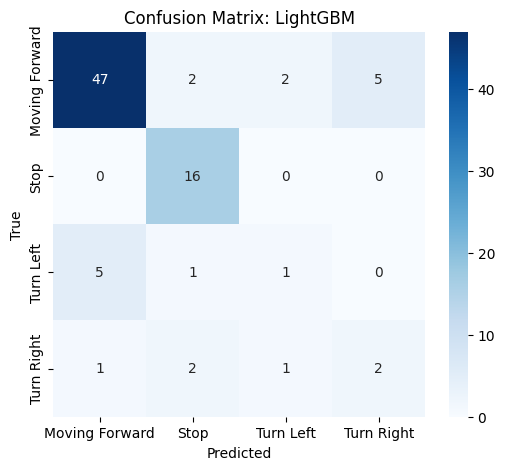

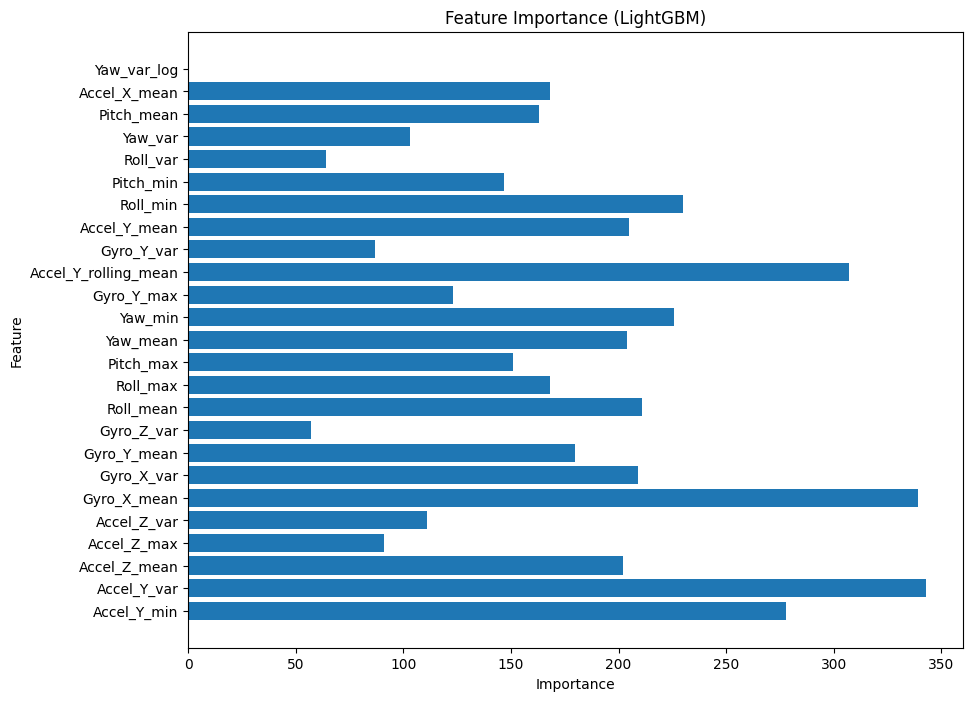

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

# Step 1: Load Preprocessed Data
data = pd.read_csv('../data-collection/2024-12-10_22-37-46_Data/updated_processed_data.csv')

# Separate features and target
X = data.drop(columns=['Label'])
y = data['Label']

# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Train LightGBM with Class Weights
lgbm_model = LGBMClassifier(
    random_state=42,
    num_leaves=31,
    max_depth=6,
    learning_rate=0.05,
    min_child_samples=20,
    class_weight='balanced'  # Automatically handles class imbalance
)

# LightGBM with early stopping
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='logloss'  # Evaluation metric
)

# Step 4: Evaluate LightGBM
y_pred = lgbm_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=lgbm_model.classes_, yticklabels=lgbm_model.classes_)
plt.title("Confusion Matrix: LightGBM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Step 5: Plot Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(X.columns, lgbm_model.feature_importances_)
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
